###Part 2. List and Tuples


##Exercise 8
In some cases, it is necessary to efficiently perform insertion or removal of elements
both at the beginning and at the end of the collection. Measure the time for the
following operations with N = 10 000, 20 000 y 30 000 elements:
a. Delete last element of a list via pop()
b. Delete first element of a list via pop(0)
c. Append 1 at the end of the list.
d. Insert 1 at the beginning of the list insert(0, 1)



In [1]:
import timeit
import pandas as pd

# The number of elements to test with
Ns = [10000, 20000, 30000]

# This function will run the given code statement and return the average time taken,
# repeating the test 1000 times.
def measure_time(code, setup, repeat=1000):
    times = timeit.repeat(stmt=code, setup=setup, repeat=repeat, number=1)
    return sum(times) / repeat

# This is the setup code common to all our timeit tests.
# It simply creates a list of N elements for the test.
common_setup = 'lst = list(range(N))'

# These are the code snippets for each operation we want to measure.
codes = {
    'pop()': 'lst.pop()',
    'pop(0)': 'lst.pop(0)',
    'append(1)': 'lst.append(1)',
    'insert(0, 1)': 'lst.insert(0, 1)'
}

# We'll store our results in this dictionary, which we will later convert to a pandas DataFrame.
results = {
    'Code': list(codes.keys()),
    'N=10000 (µs)': [],
    'N=20000 (µs)': [],
    'N=30000 (µs)': []
}

# Now we measure the time for each operation, for each N.
for N in Ns:
    setup = common_setup.replace('N', str(N))
    for code in codes:
        time_taken = measure_time(codes[code], setup) * 1e6  # convert seconds to microseconds
        results[f'N={N} (µs)'].append(time_taken)

# Convert our results dictionary to a pandas DataFrame for pretty printing.
df = pd.DataFrame(results)

# Display the DataFrame
df


,Code,N=10000 (µs),N=20000 (µs),N=30000 (µs)
0,pop(),0.453002,0.748565,1.090743
1,pop(0),2.864092,5.035039,10.893319
2,append(1),0.630556,0.695865,1.054142
3,"insert(0, 1)",6.313334,17.967047,37.458460


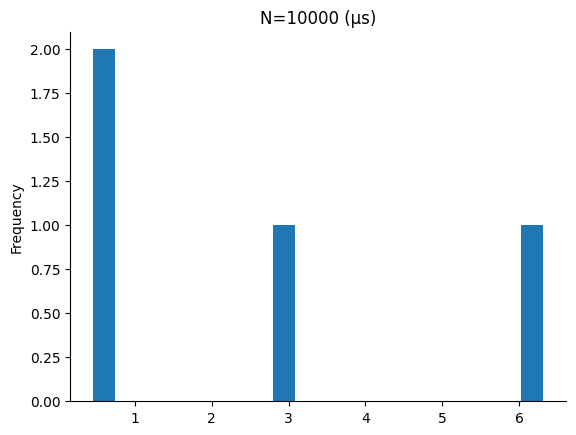

In [2]:
# @title N=10000 (µs)

from matplotlib import pyplot as plt
df['N=10000 (µs)'].plot(kind='hist', bins=20, title='N=10000 (µs)')
plt.gca().spines[['top', 'right',]].set_visible(False)

Explanation:
We first import the required modules: timeit for timing the code and pandas to present the results in a table.

We define a function measure_time that uses timeit.repeat to measure the average execution time of a statement.

common_setup is the code that initializes a list lst with N elements.
codes is a dictionary that holds the code statements for each operation (pop, pop(0), append, and insert).
We create an empty results dictionary to hold our measurements.

In the loop, we replace N with the actual number of elements, run the time measurements, convert the time to microseconds, and append the results to the results dictionary.
Finally, we create a pandas DataFrame from the results dictionary and display it.

##Exercise 9
 Python provides a data structure with interesting properties in the collection.deque
class. The word deque stands for double-ended queue because this data structure
is designed to efficiently put and remove elements at the beginning and at the end
of the collection. Evaluate the following methods with N = 10 000, 20 000 and 30
000 elements:
a. deque.pop()
b. deque.popleft()
c. deque.append(1)
d. deque.appendleft(1)

In [3]:
import timeit
from collections import deque
import pandas as pd

# Define the number of elements for each scenario
Ns = [10000, 20000, 30000]

# Initialize a dictionary to store the results
timings = {'Operation': ['deque.pop()', 'deque.popleft()', 'deque.append(1)', 'deque.appendleft(1)'], 'N=10000 (µs)': [], 'N=20000 (µs)': [], 'N=30000 (µs)': []}

# Define the setup code that initializes a deque with N elements
setup_code = "from collections import deque; dq = deque(range(N))"

# Define the statements for each operation
operations = {
    'deque.pop()': 'dq.pop()',
    'deque.popleft()': 'dq.popleft()',
    'deque.append(1)': 'dq.append(1)',
    'deque.appendleft(1)': 'dq.appendleft(1)'
}

# Measure the time for each operation and store the results
for N in Ns:
    for operation in operations:
        # Prepare the setup code with the current N
        setup = setup_code.replace("N", str(N))

        # Measure the time and convert to microseconds
        time = timeit.timeit(stmt=operations[operation], setup=setup, number=1000) * 1e6 / 1000

        # Store the result
        timings[f'N={N} (µs)'].append(time)

# Convert the results dictionary to a DataFrame for display
results_df = pd.DataFrame(timings)

# Output the dataframe to visually verify the table
print(results_df)


             Operation  N=10000 (µs)  N=20000 (µs)  N=30000 (µs)
0          deque.pop()      0.052311       0.02863       0.04870
1      deque.popleft()      0.045630       0.06286       0.04696
2      deque.append(1)      0.028110       0.04693       0.04459
3  deque.appendleft(1)      0.029430       0.04607       0.04259


Set Up the Environment: Import the required modules timeit for timing, deque for the data structure to test, and pandas for creating tables.

Define Test Sizes: Create a list Ns that contains the sizes of the deques to test (10,000, 20,000, and 30,000 elements).

Initialize Results Storage: Set up a dictionary timings with keys for operation names and corresponding empty lists to store the timing results for each test size.

Prepare for Timing: Write the setup code in a string, setup_code, which initializes a deque with N elements. Also, create a dictionary operations mapping operation names to the code snippets that will be timed.

Measure Times: Loop over each size N and each operation, replace N in the setup code, and use timeit.timeit to measure the average time of each operation over 1000 executions, storing the results in microseconds in timings.

Display Results: Convert the timings dictionary to a pandas DataFrame and print it to show a table with the average times for each operation at each size.

##Exercise 10
 The efficiency gained by the appendleft and popleft comes at a cost: accesing an
element in the middle of a deque is a O(N) operation. Evaluate the time for the next
operations with with N = 10 000, 20 000 and 30 000 elements:
a. deque[0]
b. deque[N-1]
c. deque[int(N/2)]
Make a table with your results. It should looks like table on pp. 39 on the same book
as previous task.

In [7]:
from collections import deque
import timeit

# Define the number of elements
element_counts = [10000, 20000, 30000]

# Initialize the dictionary to store the results
results = {"Code": ["deque[0]", "deque[N - 1]", "deque[int(N / 2)]"],
           "N=10000 (µs)": [], "N=20000 (µs)": [], "N=30000 (µs)": []}

# Loop through each number of elements to create deques and measure access times
for N in element_counts:
    # Create a deque with N elements
    dq = deque(range(N))

    # Time access to the first element
    time_first = timeit.timeit("dq[0]", globals=globals(), number=1000) * 1e6 / 1000
    results["N=10000 (µs)" if N == 10000 else "N=20000 (µs)" if N == 20000 else "N=30000 (µs)"].append(time_first)

    # Time access to the last element
    time_last = timeit.timeit("dq[N - 1]", globals=globals(), number=1000) * 1e6 / 1000
    results["N=10000 (µs)" if N == 10000 else "N=20000 (µs)" if N == 20000 else "N=30000 (µs)"].append(time_last)

    # Time access to the middle element
    time_middle = timeit.timeit("dq[int(N / 2)]", globals=globals(), number=1000) * 1e6 / 1000
    results["N=10000 (µs)" if N == 10000 else "N=20000 (µs)" if N == 20000 else "N=30000 (µs)"].append(time_middle)

# Present the results as a DataFrame
import pandas as pd
pd.DataFrame(results)


,Code,N=10000 (µs),N=20000 (µs),N=30000 (µs)
0,deque[0],0.02888,0.04855,0.037780
1,deque[N - 1],0.04565,0.44914,0.074000
2,deque[int(N / 2)],0.19291,0.54198,0.783691


When lists in Python grow, they don't just allocate the exact memory needed for the new element. Instead, Python allocates more memory than is immediately required. This is known as overallocation and it is an optimization to prevent having to reallocate memory each time an element is added to the list, which is a costly operation. This way, subsequent appends can be done without reallocation until the preallocated space is used up. This strategy means that list appends have an amortized complexity of O(1), because although sometimes the operation will be O(N) due to the need to reallocate and copy, these costly operations happen infrequently enough that the average time complexity remains constant.

##Exercise 11
 Explain what is Overallocation in lists.

Lists in Python are dynamic arrays. They don't have a fixed size, meaning they can grow or shrink as elements are added or removed. To support this flexibility, Python allocates more memory than is immediately required when creating a list or when a list grows.

Here's what happens in detail:

Initial Allocation: When you create a list, Python allocates a certain amount of space based on the list's initial size. This is more space than the list currently needs, to avoid having to reallocate memory every time you append an element.

Growth: When you append items and the list fills up the allocated space, Python needs to allocate more memory to fit the additional elements. Instead of just allocating space for the new element, Python allocates extra space in anticipation of future growth.

Benefits: Overallocation minimizes the number of memory reallocations needed as the list grows, which is a costly operation. By overallocating, Python reduces the overhead of frequently increasing the list's size.

Amortized Complexity: Because of overallocation, while the actual appending of a single element can occasionally require a costly memory reallocation (O(N) operation), most of the time, appending is O(1). This gives the append operation an amortized time complexity of O(1).

This strategy is a trade-off: it uses more memory than strictly necessary to achieve better average performance when frequently adding elements to the list. It's a common technique in dynamic array implementations, not just in Python, but in other programming languages as well.






